In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import HTC

In [3]:
# Load connectome and normalize it

#W=np.loadtxt("../Data/connectivity_matrix/weights.txt")
W=np.loadtxt("../Data/Hagmann/group_mean_connectivity_matrix_file.txt")
W=W/W.sum(axis=1)[:,None]

In [4]:
# Create brain object and set its parameters

brain=HTC.Brain(W)
#brain.set_netowrk_parameters(2/998,(2/998)**(1/5),(2/998)**(1/5)/(1+2*(2/998)**(1/5))/1.2)
brain.set_netowrk_parameters(r1=2/brain.n_neurons, r2=(2/brain.n_neurons)**0.2, tc=0.15)


In [5]:
active_frac=0.1
n_runs=50
tmin=0.01
tmax=0.3
delta_tc=0.01
dt=0.1
n_timesteps=600
s_step=10
compute_s1_s2=True
compute_s_distrib=True

In [6]:
%%time
tc, a,sigma_a,s1,s2,s_distrib=brain.simulation(active_frac=active_frac, n_runs=n_runs,
                      tmin=tmin, tmax=tmax, delta_tc=delta_tc,
                      dt=dt, n_timesteps=n_timesteps,
                      compute_s1_s2=compute_s1_s2, s_step=s_step,
                      compute_s_distrib=compute_s_distrib, tc_distrib=0.15)

CPU times: user 43min 18s, sys: 6min 8s, total: 49min 26s
Wall time: 12min 59s


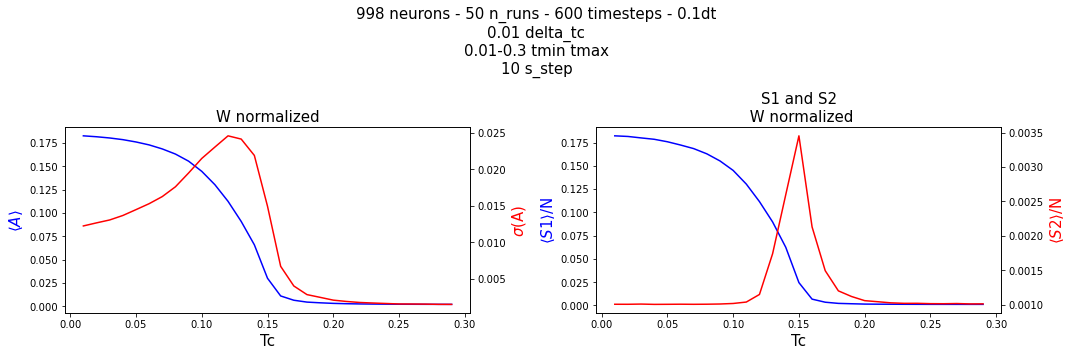

In [8]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,5))
n_neurons=brain.n_neurons

ax01=ax0.twinx()

ax0.set_title("W normalized", size=15)
ax0.set_xlabel("Tc", size=15)
ax0.set_ylabel(r"$\langle A \rangle$", size=15)
ax0.plot(tc, a, color="blue")
ax0.yaxis.label.set_color("blue")


ax01.set_ylabel(r'$\sigma$(A)', size=15)
ax01.plot(tc, sigma_a, "red")
ax01.yaxis.label.set_color("red")

ax1.set_title("S1 and S2\n W normalized", size=15)
ax1.set_xlabel("Tc", size=15)
ax1.set_ylabel(r"$\langle S1 \rangle$/N", size=15)
ax1.plot(tc, s1/brain.n_neurons, color="blue")
ax1.yaxis.label.set_color("blue")


ax11=ax1.twinx()
ax11.plot(tc,s2/brain.n_neurons, color="red")
ax11.set_ylabel(r"$\langle S2 \rangle$/N", size=15)
ax11.yaxis.label.set_color("red")

fig.suptitle(str(n_neurons)+" neurons - "+str(n_runs)+" n_runs - "
             +str(n_timesteps)+" timesteps - "+str(dt)+"dt\n"+str(delta_tc)+" delta_tc\n"+str(tmin)+"-"+str(tmax)+" tmin tmax\n"+str(s_step)+" s_step", size=15)
plt.tight_layout()


plt.savefig(str(n_neurons)+"_neurons_"+str(n_runs)+"_nruns_"+str(n_timesteps)+"_timesteps.jpg")
plt.show()

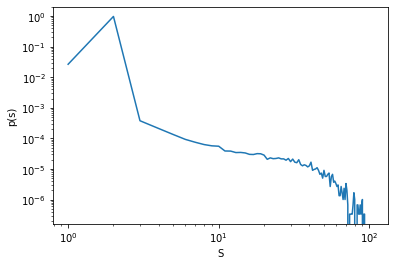

In [9]:
import matplotlib.ticker

x=np.arange(1,int(s_distrib.max())+1)
l=np.zeros(int(s_distrib.max()))
for i in range(int(s_distrib.max())):
    l[i]=((s_distrib==i).astype(np.int16)).sum()
ll=l/l.sum()

fig, ax=plt.subplots()
ax.loglog(x, ll )
ax.set_xlabel("S")
ax.set_ylabel("p(s)")
#ax.set_xticks([1,2,4,8,16,24])
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.show()